Установка SpeechRecognition

In [1]:
pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\AAA_Speech2Text_V22\envSpeech\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install pyaudio

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\AAA_Speech2Text_V22\envSpeech\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install librosa 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\AAA_Speech2Text_V22\envSpeech\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install wave 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\AAA_Speech2Text_V22\envSpeech\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\AAA_Speech2Text_V22\envSpeech\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\AAA_Speech2Text_V22\envSpeech\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import speech_recognition as sr 
import pyaudio
import wave as wave
import librosa
sr.__version__


'3.9.0'

In [46]:
CHUNK = 1024 # определяет форму ауди сигнала
FRT = pyaudio.paInt16 # шестнадцатибитный формат задает значение амплитуды
CHAN = 1 # канал записи звука
RT = 44100 # частота 
REC_SEC = 5 #длина записи
OUTPUT = "output.wav"

нужно создать объект для обращения к устройству звукозаписи:

In [47]:
p = pyaudio.PyAudio()

и открыть поток для записи звука:

In [48]:
stream = p.open(format=FRT,channels=CHAN,rate=RT,input=True,frames_per_buffer=CHUNK) # открываем поток для записи
print("rec")
frames = [] # формируем выборку данных фреймов
for i in range(0, int(RT / CHUNK * REC_SEC)):
    data = stream.read(CHUNK)
    frames.append(data)
print("done")
 
stream.stop_stream() # останавливаем и закрываем поток 
stream.close()
p.terminate()

rec
done


Дальше нам нужно записать оцифрованную звуковую дорожку в файл.

Для этого нам и пригодится библиотека wave:

In [49]:
w = wave.open(OUTPUT, 'wb')
w.setnchannels(CHAN)
w.setsampwidth(p.get_sample_size(FRT))
w.setframerate(RT)
w.writeframes(b''.join(frames))
w.close()

In [50]:
sample = sr.WavFile('D:\\AAA_Speech2Text_V22\\output.wav')

Открываем записанный файл.

Для расшифровки сигнала мы будем использовать метод recognize_google().

но, перед тем как передать сигнал на расшифровку, нужно очистить его от шумов. У библиотеки speech_recognition есть для этого метод adjust_for_ambient_noise()

In [51]:
r = sr.Recognizer()

with sample as audio:
    content = r.record(audio)
    r.adjust_for_ambient_noise(audio)

Так как выбранный нами Api поддерживает русский язык мы можем им воспользоваться:
#recognize_sphinx
#recognize_google

In [52]:
print(r.recognize_google(content, language="ru-RU")) 

result2:
{   'alternative': [   {   'confidence': 0.90035385,
                           'transcript': 'хочу записаться к терапевту потому '
                                         'что у меня течёт кровь из глаз'},
                       {   'transcript': 'хочу записаться к терапевту потому '
                                         'что у меня течёт кровь'},
                       {   'transcript': 'хочу записаться к терапевту потому '
                                         'что у меня течёт кровь из'},
                       {   'transcript': 'хочу записаться к терапевту потому '
                                         'что у меня течёт кровь из горла'},
                       {   'transcript': 'хочу записаться к терапевту потому '
                                         'что у меня течёт кровь из игры'}],
    'final': True}
хочу записаться к терапевту потому что у меня течёт кровь из глаз


Далее можно приступить к получению аналитических данных с помощью библиотеки librosa. Для начала загружаем наш файл:

In [53]:
A_Data = 'D:\\AAA_Speech2Text_V22\\output.wav'
y , sf = librosa.load(A_Data)

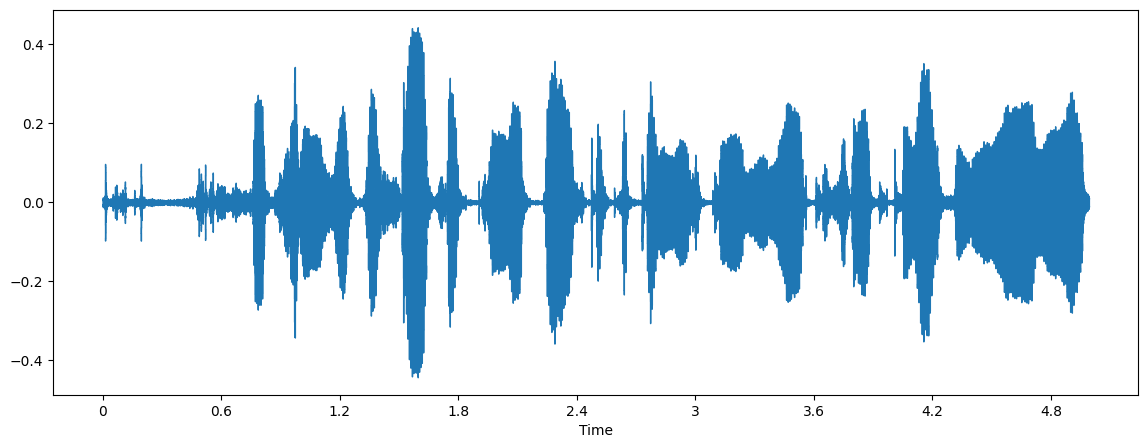

In [54]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sf)

кепстральные коэффициенты, они обычно используются для определения тембральных аспектов музыкального инструмента или голоса
и  мы можем построить их тепловую карту  и хроматограмму.

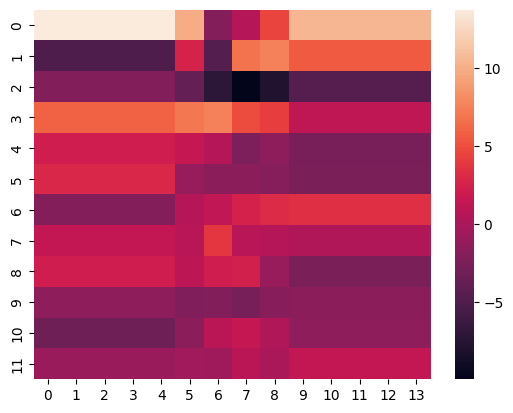

In [55]:
fcc = librosa.feature.mfcc(y=y, sr=sf, hop_length=8192, n_mfcc=12)
import seaborn as sns
from matplotlib import pyplot as plt
fcc_delta = librosa.feature.delta(fcc)
sns.heatmap(fcc_delta)
plt.show()

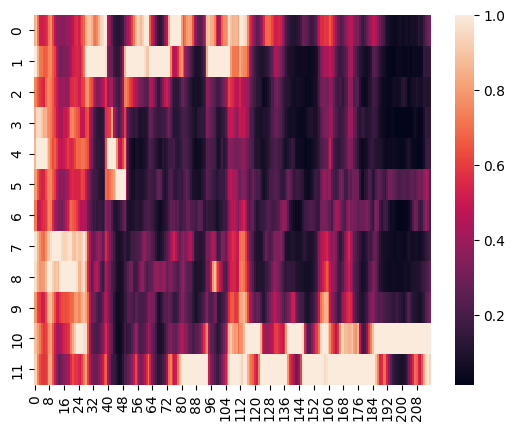

In [56]:
chromo = librosa.feature.chroma_cqt(y=y, sr=sf)
sns.heatmap(chromo)
plt.show()